In [605]:
import numpy as np
from sklearn import svm
import scipy
import time
import matplotlib.pyplot as plt
import math as m
from matplotlib import cm
import mpmath

In [431]:
a=cm.get_cmap(name='RdBu')

ValueError: Colormap Sequential is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

### Parameters

In [341]:
#Test set and dimensions
d = 4
n_test = 2000

#Interface location and parameters
x_0 = 0

#variance of training and test sets
gamma = 1.

class Laplace_kernel:
    def __init__(self,sigma=100.):
        self.sig=sigma
    
    def method(self,X,Y):
        K = scipy.spatial.distance.cdist(X,Y)
        K = np.exp(-K/self.sig)
        return K
    
#delta parameter
def delta_theoric (p,d=4) :
    return np.array(np.power(p,-1/d))

def size (delta,d=4) :
    return np.array(np.power(delta,-d))


### Delta Distance

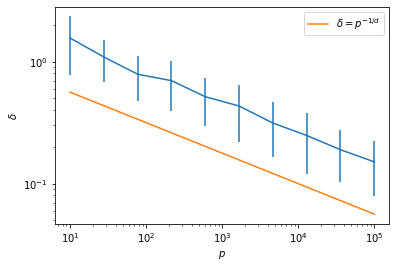

In [342]:
from scipy.spatial.distance import cdist 

deltas = {}  # deltas[p] = avg nn distance for p points

#for p in np.logspace(1,5,10):
#    subset_size = 1000  # points used to compute the average (actually, min(p, subset_size))
#    x = np.random.randn(int(p),d)  # or whatever your data are, if you scaled them differently
#    dists = cdist(x[:subset_size], x)
#    dists[dists == 0] = np.inf  # I replace the "diagonal" because otherwise the min distance would be 0
#    all_deltas = dists.min(axis=1)  # take min wrt to the p distances -> this vector is of size min(p, subset_size)
#    deltas[p] = (all_deltas.mean(), all_deltas.std()) 
    
def delta_num (data,subset_size=100) : 
    subset_size = min(len(data),subset_size)
    dists = cdist(data[:subset_size],data)
    dists[dists == 0] = np.inf
    all_deltas = dists.min(axis=1)
    return (all_deltas.mean(),all_deltas.std())

for p in np.logspace(1,5,10) :
    x = np.random.randn(int(p),d)
    deltas[p] = delta_num(x)
    
    
points = np.array(list(deltas.keys()))
plt.errorbar(points, [ m for m, s in deltas.values() ], yerr=[ s for m, s in deltas.values() ])
plt.plot(points, points**(-1/d),label='$\delta = p^{-1/d}$')
plt.plot()
plt.xlabel(r'$p$')
plt.ylabel(r'$\delta$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('Delta_plot',format='png')

### Plotting Interface

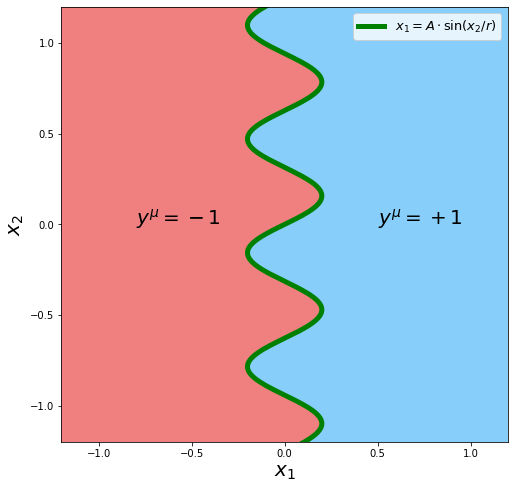

In [343]:
def Interface_plot (x1=0,x2=0,gamma=1,a=1,r=1,x_0=0, name='Interface', save=False) : 
    t = np.arange(x1-2*gamma,x1+2*gamma,0.01)
    plt.figure(name,figsize=(8,8))
    plt.plot(a*np.sin(t/r)+x_0,t,'g-',Linewidth=5,label='$x_1=A\cdot$sin$(x_2 / r)$')
    plt.fill_betweenx(t,a*np.sin(t/r)+x_0,x2=1.2,color='lightskyblue')
    plt.fill_betweenx(t,a*np.sin(t/r)+x_0,x2=-1.2,color='lightcoral')
    plt.text(0.5,0.0,'$y^\mu=+1$',fontsize=20)
    plt.text(-0.8,0.0,'$y^\mu=-1$',fontsize=20)
    plt.xlim(x1-gamma*1.2,x1+gamma*1.2)
    plt.ylim(x2-gamma*1.2,x2+gamma*1.2)
    plt.xlabel('$x_1$',size=20)
    plt.ylabel('$x_2$',size=20)
    plt.legend(fontsize=13)
    if save== True :
        plt.savefig(name, format='png')
Interface_plot(a=0.2,r=0.1,name='interface_02_01',save=True)

### Training and test sets/SVC 

In [344]:
def test_set(amplitude, r_scale, n_test = 2000, x_0=0, gamma=1., d=2) :
    rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    test = rand_state2.normal(x_0, gamma, (n_test,d))
    test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/r_scale)+x_0))
    return [test,test_labels]

In [345]:
def support_vectors(train_set,train_labels,clf=svm.SVC(kernel=Laplace_kernel.method)):
    clf.fit(train_set,train_labels)
    sup_vec=clf.support_
    support_vectors = np.array([train_set[i] for i in sup_vec])
    return support_vectors


In [346]:
p = 1000

amplitude = 0.00001
r_scale = 0.3

rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
train = rand_state1.normal(x_0, gamma, (p,d))
test = rand_state2.normal(x_0, gamma, (n_test,d))

train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/r_scale)+x_0))
test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/r_scale)+x_0))

Ker = Laplace_kernel(100)
clf = svm.SVC(C=1000,kernel=Ker.method)
clf.fit(train,train_labels)
clf.score(test,test_labels)
      
    

0.984

In [347]:
def learning(amplitude, r_scale, p=1000, sigma=100, x_0=0, gamma=1., d=2) :
    rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    train = rand_state1.normal(x_0, gamma, (p,d))
    test = rand_state2.normal(x_0, gamma, (n_test,d))
    #labeling
    train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/r_scale)+x_0))
    test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/r_scale)+x_0))
    #classifier
    Ker = Laplace_kernel(sigma)
    clf = svm.SVC(C=1000,kernel=Ker.method)
    clf.fit(train,train_labels)
    return clf

In [348]:
def plot_sv(amplitude, r_scale, p=1000, sigma=100, x_0=0, gamma=1., d=2, name='Suppvec') : 
    rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    train = rand_state1.normal(x_0, gamma, (p,d))
    test = rand_state2.normal(x_0, gamma, (n_test,d))
    #labeling
    train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/r_scale)+x_0))
    test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/r_scale)+x_0))
    #classifier
    Ker = Laplace_kernel(sigma)
    clf = svm.SVC(C=1000,kernel=Ker.method)
    plt.figure(name,figsize=(10,10))
    sv = support_vectors(train,train_labels,clf) #fits and returns the SVs
    for k in train :
        plt.plot(k[0],k[1],(k in sv)*'r.'+(k not in sv)*'b.')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel(r'x1')
    plt.ylabel(r'x2')  

In [349]:
def bandwidth (amplitude, r_scale, sv_tab) :
    coord_x1 = np.array([sv[0] for sv in sv_tab])
    coord_x2 = np.array([sv[1] for sv in sv_tab])
    dist = np.absolute(coord_x1-amplitude*np.sin(coord_x2/r_scale))
    return np.mean(dist)
        
        

In [350]:
def dist_Delta (amplitude, r_scale, p=10000, sigma=100, x_0=0, gamma=1., d=4) : 
    rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    train = rand_state1.normal(x_0, gamma, (p,d))
    test = rand_state2.normal(x_0, gamma, (n_test,d))
    #labeling
    train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/r_scale)+x_0))
    test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/r_scale)+x_0))
    #classifier
    Ker = Laplace_kernel(sigma)
    clf = svm.SVC(C=1000,kernel=Ker.method)
    sv = support_vectors(train,train_labels,clf) #fits and returns the SVs
    return bandwidth(amplitude,r_scale,sv)
    

In [12]:
dist_Delta(0.05,0.3)

0.042606591690865434

No handles with labels found to put in legend.


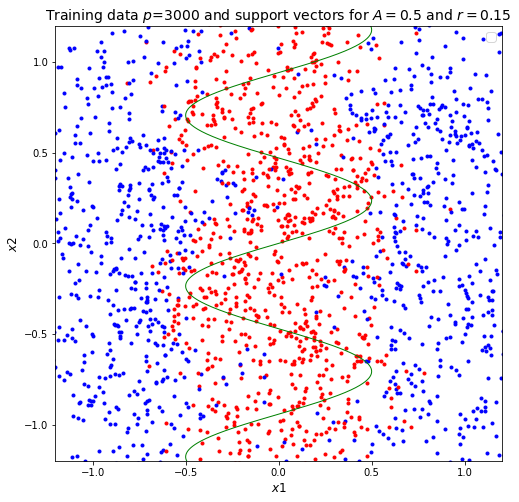

In [522]:
def plot_all(amplitude, r_scale, p=1000, sigma=100, x_0=0, gamma=1., d=4, name='Figure',save=False) : 
    rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-5:]))
    train = rand_state1.normal(x_0, gamma, (p,d))
    test = rand_state2.normal(x_0, gamma, (n_test,d))
    #labeling
    train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/r_scale)+x_0))
    test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/r_scale)+x_0))
    #classifier
    Ker = Laplace_kernel(sigma)
    clf = svm.SVC(C=1000,kernel=Ker.method)
    plt.figure(name,figsize=(8,8))
    sv = support_vectors(train,train_labels,clf) #fits and returns the SVs
    t = np.arange(-2,2,0.001)
    for k in train :
        plt.plot(k[0],k[1],(k in sv)*'r.'+(k not in sv)*'b.')
    plt.plot(amplitude*np.sin(t/r_scale)+x_0,t,'g-',Linewidth=1)
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.xlabel('$x1$',fontsize=12)
    plt.ylabel('$x2$',fontsize=12)
    plt.title('Training data $p$='+str(p)+' and support vectors for $A=$'+str(amplitude)+' and $r=$'+str(r_scale),fontsize=14)
    plt.legend(fontsize=12)
    if save==True :
        plt.savefig(name,format='png')
plot_all(.5,0.15,d=4,p=3000,name='Plot1a',save=True)

### Integration, area calculation

In [603]:
def Area (amplitude, r_scale, x_min=-1., x_max=1., step_size=0.001):
    x = np.arange(x_min,x_max,step_size)
    area = np.abs(amplitude*np.sin(x/r_scale))
    total = np.sum(area*step_size)
    return total

def Arc_length(amplitude, r_scale, x_min=-10, x_max=10, step_size=0.001):
    x = np.arange(x_min,x_max,step_size)
    derivative_2 = np.square(amplitude/r_scale*np.cos(x/r_scale))
    ds = np.sqrt(1+derivative_2)
    length = np.sum(ds*step_size)
    return length
def Probability(a,b,step_size=0.0001):
    x = np.arange(a,b,step_size)
    integrand=(2*np.pi)**-0.5*np.exp(-x**2/2)
    return np.sum(integrand*step_size)

def Errorf(a,r):
    area = scipy.integrate.quad(lambda x : 0.25*r/np.pi*np.exp(-0.5*(r**2*x**2+a**2*(np.sin(x))**2)), -np.inf,np.inf)
    return area

def Error_scipy(a,r,Delta):
    area = scipy.integrate.dblquad(lambda x, y: 0.25/np.pi*np.exp(-0.5*x**2)*np.exp(-0.5*y**2),-np.inf, np.inf, lambda y: a*np.sin(y/r)-Delta, lambda y: a*np.sin(y/r)+Delta)
    return area
def Error_test(a,r,step_size=0.0001):
    x = np.arange(-10,10,step_size)
    integrand=0.25/np.pi*np.exp(-0.5*(x**2+a**2*(np.sin(x/r))**2))
    return np.sum(integrand*step_size)
def Jacobi(r):
    return mpmath.jtheta(3,0,np.exp(-(np.pi*r)**2/2))

In [606]:
Jacobi(1)

mpf('1.0143837720622287')

### Parameter-scan functions

In [352]:
#TO DO : use functions pre-defined above
def learning_r (r=np.linspace(1.,0.001,10),sigma=100.,p_tab=np.logspace(1.7,4.2,num=40,dtype=int),number=20) :
    
    amplitude = 1.
    K = Laplace_kernel(sigma)
    clf2 = svm.SVC(C=10.0000,kernel=K.method)
    p = p_tab
    error = np.empty((number,len(r),len(p))) #for iterating over r
    for k in range(len(r)):
        rscale = r[k]
        print("--------------------------------------> r =",rscale)
        for i in range(number) : 
            print("------------> SAMPLE# :",i+1)
            for z in range(len(p)) :
                print("TRAINING SIZE :",p[z])
                rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                train = rand_state1.normal(x_0, gamma, (p[z],d))
                test = rand_state2.normal(x_0, gamma, (n_test,d))
                train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/rscale)+x_0))
                test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/rscale)+x_0))
                clf2.fit(train,train_labels)
                if clf2.fit_status_ !=0 :
                    print("NOT FITTED")
                e = 1 - clf2.score(test,test_labels)
                error[i,k,z] = e
    return error
            
def learning_a (a=np.logspace(-3,1,num=10),sigma=100.,p_tab=np.logspace(1.7,4.2,num=40,dtype=int),number=20) :
    
    rscale = 0.2154
    K = Laplace_kernel(sigma)
    clf2 = svm.SVC(C=10.0000,kernel=K.method)
    p = p_tab
    error = np.empty((number,len(a),len(p))) #for iterating over A
    for k in range(len(a)):
        amplitude = a[k]
        print("--------------------------------------> A =",amplitude)
        for i in range(number) : 
            print("-------------> SAMPLE# :",i+1)
            for z in range(len(p)) :
                print("TRAINING SIZE :",p[z])
                rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                train = rand_state1.normal(x_0, gamma, (p[z],d))
                test = rand_state2.normal(x_0, gamma, (n_test,d))
                train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/rscale)+x_0))
                test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/rscale)+x_0))
                clf2.fit(train,train_labels)
                if clf2.fit_status_ !=0 :
                    print("NOT FITTED")
                e = 1 - clf2.score(test,test_labels)
                error[i,k,z] = e
    return error

def learning_sigm (r=0.2154,a=1.,sigma_tab = np.logspace(0,2,num=10),p_tab=np.logspace(1.7,4.2,num=40,dtype=int),number=20) :
  
    rscale = r
    p = p_tab
    error = np.empty((number,len(sigma_tab),len(p))) #for iterating over sigma values
    for k in range(len(sigma_tab)):
        sigma=sigma_tab[k]
        K = Laplace_kernel(sigma)
        clf2 = svm.SVC(C=10.0000,kernel=K.method)
        print("---------------------------------------> sigma =",sigma)
        for i in range(number) : 
            print("--------------> SAMPLE# :",i+1)
            for z in range(len(p)) :
                print("TRAINING SIZE :",p[z])
                rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                train = rand_state1.normal(x_0, gamma, (p[z],d))
                test = rand_state2.normal(x_0, gamma, (n_test,d))
                train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/rscale)+x_0))
                test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/rscale)+x_0))
                clf2.fit(train,train_labels)
                if clf2.fit_status_ !=0 :
                    print("NOT FITTED")
                e = 1 - clf2.score(test,test_labels)
                error[i,k,z] = e
    return error

def learning_r_a_delta (r = np.linspace(0.1,0.2,10),a = np.linspace(0.1,1.,10),sigma=100.,p_tab=np.logspace(1.7,4.2,num=40,dtype=int),number=10): # returns 2 arrays : 1 with errors values of dimension number*len(r)*len(a)*len(p), the other with delta values of same dimensions 
    
    K = Laplace_kernel(sigma)
    clf2 = svm.SVC(C=10.0000,kernel=K.method)
    p = p_tab
    error = np.empty((number,len(r),len(a),len(p))) 
    deltas= {}
    for k in range(len(r)):
        rscale = r[k]
        print("--------------------------------------> r =",rscale)
        for j in range(len(a)) : 
            amplitude = a[j]
            print("------------------------------------> A =",amplitude)
            for i in range(number) : 
                print("------------> SAMPLE# :",i+1)
                for z in range(len(p)) :
                    print("TRAINING SIZE :",p[z])
                    rand_state1 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                    rand_state2 = np.random.RandomState(seed=int(str(int(time.time()*1E6))[-6:]))
                    train = rand_state1.normal(x_0, gamma, (p[z],d))
                    deltemp = delta_num (train,subset_size=100)
                    deltas[i,k,j,z] = deltemp
                    test = rand_state2.normal(x_0, gamma, (n_test,d))
                    train_labels = np.sign(train[:,0]-(amplitude*np.sin(train[:,1]/rscale)+x_0))
                    test_labels = np.sign(test[:,0]-(amplitude*np.sin(test[:,1]/rscale)+x_0))
                    clf2.fit(train,train_labels)
                    if clf2.fit_status_ !=0 :
                        print("NOT FITTED")
                    e = 1 - clf2.score(test,test_labels)
                    error[i,k,j,z] = e
    return (error,deltas)
    

### Plot 1 

In [144]:
#All simulations were made using train sets from 50 to 15848 examples 
p = np.logspace(1.7,4.2,num=40,dtype=int)
delta_th = delta_theoric(p)


In [13]:
r0 = np.load('0r_tab_niceplot.npy')
data0 = np.load('0data_niceplot_averaged.npy')
print(len(r0))

10


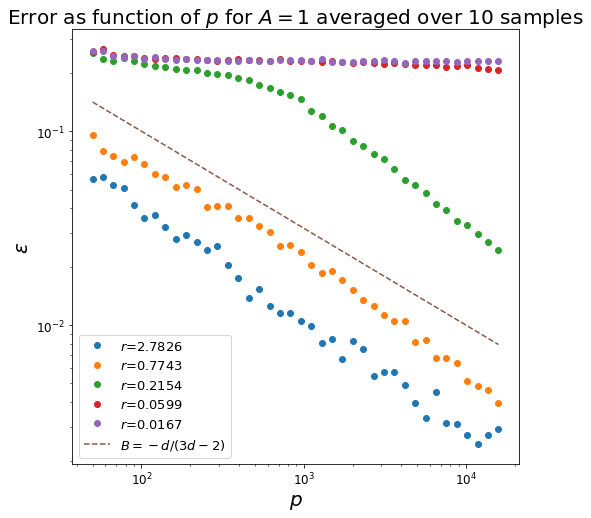

In [14]:
#10 values of r are taken on logscale from 10 to 1E-4. For each value the error is averaged over 20 samples.

plt.figure('Plot1',figsize=(8,8))
for i in range(1,6):
    plt.plot(p,data0[i],'o',label='$r$=%.4f'%r0[i])
plt.plot(p,p**-0.5,'--',label='$B=-d/(3d-2)$')
plt.xlabel('$p$',size=20)
plt.ylabel('$\epsilon$',size=20)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $p$ for $A=1$ averaged over 10 samples',fontsize=20)
plt.savefig('Plot1',format='png')



### Plot 3

In [327]:
r2 = np.load('2r_tab_30_03.npy')
data2_na = np.load('2critical_30_03.npy')
print(r2)

[0.8        0.76315789 0.72631579 0.68947368 0.65263158 0.61578947
 0.57894737 0.54210526 0.50526316 0.46842105 0.43157895 0.39473684
 0.35789474 0.32105263 0.28421053 0.24736842 0.21052632 0.17368421
 0.13684211 0.1       ]


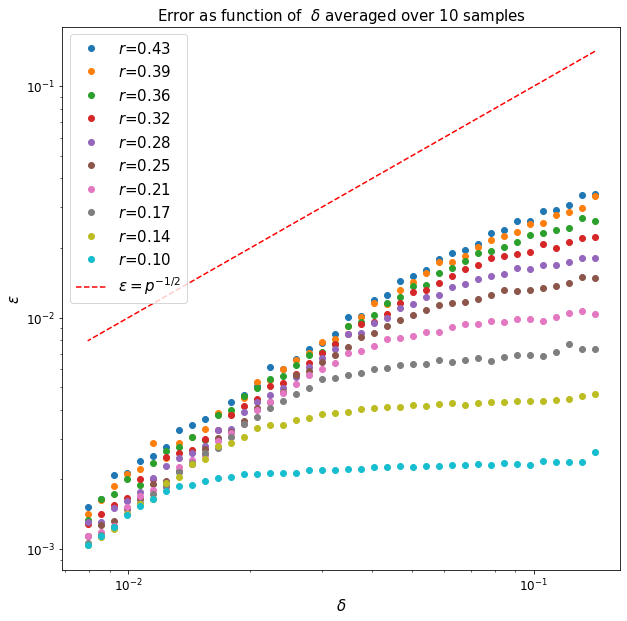

In [331]:
#20 values of r are taken on linscale from 0.8 to 0.1.
s2=size(r2)
#Averaging over 20 samples
data2 = np.average(data2_na, axis=0)

n_start =10
n_lines =15 
plt.figure('Plot3',figsize=(10,10))
for i in range(n_start,min(n_start+n_lines,len(data2))):
    #plt.plot(p,data2[i],'o') #
    plt.plot(p**-0.5/(r2[i]*2*np.pi)**0,data2[i]*r2[i]**2,'o',label='$r$=%.2f'%r2[i])
plt.plot(p**-0.5,p**-0.5,'r--', label = '$\epsilon=p^{-1/2}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=15)
plt.title('Error as function of  $\delta$ averaged over 10 samples', fontsize=15)
plt.savefig('Plot_last_0',format='png')


#inegalité sur r2 booléen
#rajouter caption

### Changing $\sigma$ Plot 5

In [ ]:
sigma4 = np.load('5sig_tab_05_04.npy')#10 values on logscale from 1 to 100
data4_na = np.load('5data_sigma.npy')
print(sigma4)

[1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]


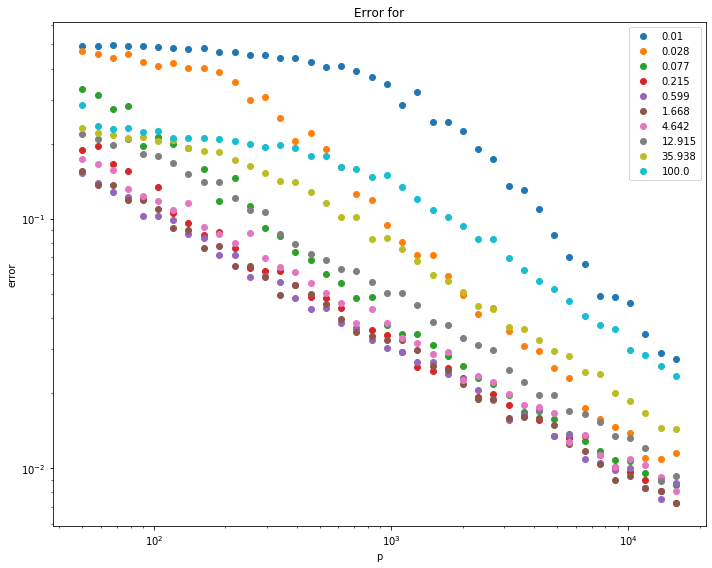

In [93]:
data4 = np.average(data4_na, axis=0)#averaged over 10 values
n_start = 0
n_lines = 10
plt.figure('Plot4',figsize=(10,8))
for i in range(n_lines):
    plt.plot(p,data4[i],'o')
plt.xlabel('p')
plt.ylabel('error')
plt.xscale('log')
plt.yscale('log')
plt.legend(np.around(sigma4[n_start:min(n_start+n_lines,len(data4))],decimals=3))
plt.title('Error for')
plt.tight_layout()

### Plot 6

In [ ]:
frequencies=np.load('10r_tab_24_04.npy')
amplitudes =np.load('10a_tab_24_04.npy')
#all_data = np.load('6data_results_05_04.npy')
data_24_04_na=np.load('10data_results_24_04.npy')
#deltas_05_04=np.load('6delta_results_05_04.npy') # 5*10*10*40 array containing (mean and std of delta computation)

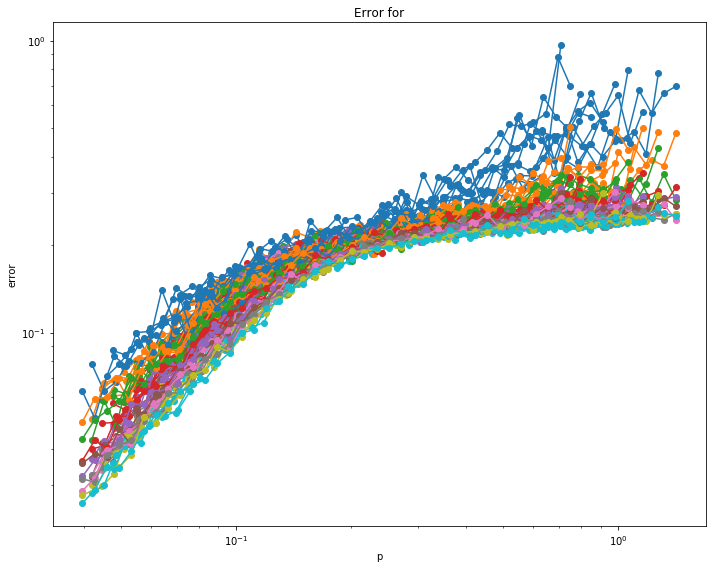

In [402]:
plt.figure('Simulation2',figsize=(10,8))
for i in range(len(frequencies)):
    for j in range(len(amplitudes)) :
        plt.plot(p**(-1/2)*(amplitudes[j]**0/frequencies[i]**0),data_sim[i,j]/amplitudes[j]**1,'o-',label = ('r=%.2f'%frequencies[i]+' A=%.1f'%amplitudes[j]))
plt.xlabel('p')
plt.ylabel('error')
plt.xscale('log')
plt.yscale('log')
#plt.legend()
plt.title('Error for')
plt.tight_layout()



### Regime $ A >> r$

In [ ]:
lambdas3=np.load('10r_tab_24_04.npy')
amplis3 =np.load('10a_tab_24_04.npy')
#all_data = np.load('6data_results_05_04.npy')
data_24_04_na=np.load('10data_results_24_04.npy')
#deltas_05_04=np.load('6delta_results_05_04.npy') # 5*10*10*40 array containing (mean and std of delta computation)

In [ ]:
data_sim4=np.average(data_24_04_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

print(amplis3)

In [ ]:
plt.figure('Simulation4',figsize=(10,10))
for i in range(1):
    for j in range(len(amplis3)) :
        plt.plot(delta_theoric(p),data_sim4[i,j]/Probability(-amplis3[j],amplis3[j])**1,'-',label = ('r=%.3f'%lambdas3[i]+' A=%.1f'%amplis3[j]))
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon/p_b(A)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.title('Rescaled error as function of $\delta$ for $A\gg r$ averaged over 5 samples',fontsize=17)
plt.savefig('PlotA_gg_r',format='png')





In [ ]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(len(lambdas4)):
    for j in range(len(amplis4)) :
        plt.plot(p**(-1/2),data_sim5[i,j],'-',label = ('$r$=%.1f'%lambdas4[i]+' $A$=%.2f'%amplis4[j]))
plt.plot(p**-0.5,p**-0.5,'--',label='$\epsilon=p^{-1/2}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=15)
plt.title('Error as function of $\delta$ for $A\gg r$ averaged over 5 samples',fontsize=20)
plt.savefig('PlotA_ll_r',format='png')

### Case $r << A$

In [270]:
lambdas4=np.load('13r_tab_30_04.npy')
amplis4=np.load('13a_tab_30_04.npy')
#all_data = np.load('6data_results_05_04.npy')
data_25_04_na=np.load('13data_results_30_04.npy')
#deltas_05_04=np.load('6delta_results_05_04.npy') # 5*10*10*40 array containing (mean and std of delta computation) 

In [272]:
data_sim5=np.average(data_25_04_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)
print(lambdas4)
print(amplis4)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
[0.5 0.8]


Text(0.5, 1.0, 'Error as function of rescaled $\\delta$ for $A > r$ averaged over 20 samples for $d=2$')

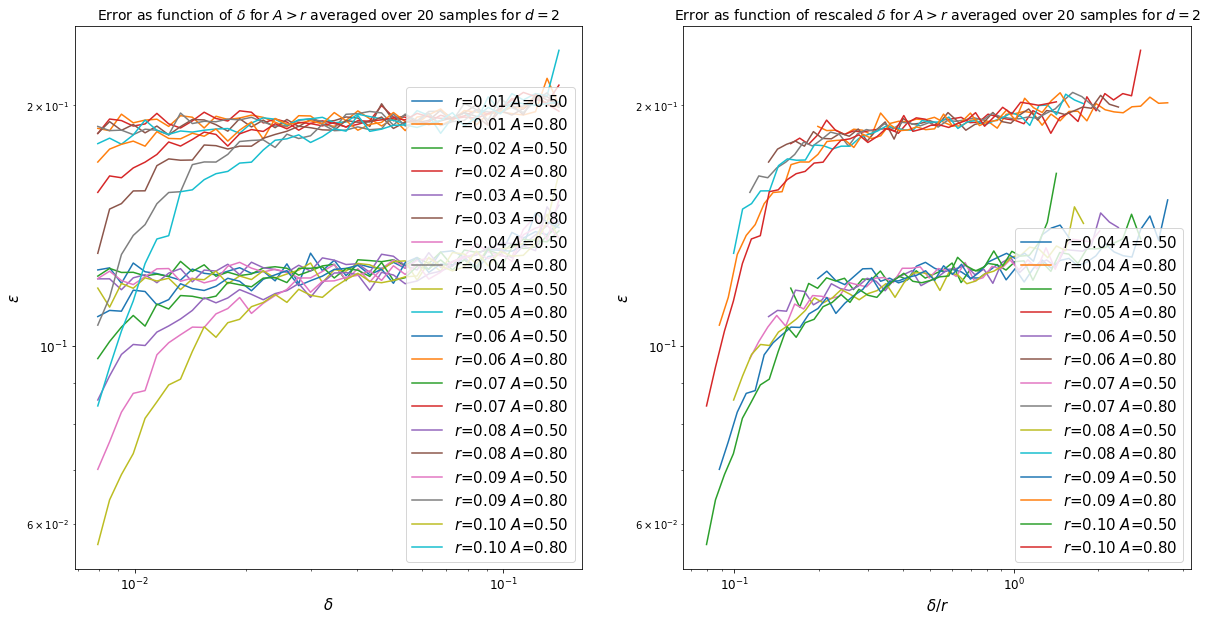

In [630]:
plt.figure('Simulation3',figsize=(20,10))
plt.subplot(1,2,1)
for i in range(10):
    for j in range(2) :
        plt.plot(p**(-1/2),data_sim5[i,j],'-',label = ('$r$=%.2f'%lambdas4[i]+' $A$=%.2f'%amplis4[j]))
#plt.plot(p**-0.5,p**-0.5,'--',label='$\epsilon=p^{-1/2}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=15)
plt.title('Error as function of $\delta$ for $A > r$ averaged over 20 samples for $d=2$',fontsize=14)
#plt.savefig('PlotA_ll_r',format='png')

plt.subplot(1,2,2)
for i in range(3,10):
    for j in range(2) :
        #print(Error_test(amplis4[j],lambdas4[i]))
        plt.plot(p**(-1/2)/lambdas4[i]**1,data_sim5[i,j]/Error_test(amplis4[j],lambdas4[i])**0/lambdas4[i]**0,'-',label = ('$r$=%.2f'%lambdas4[i]+' $A$=%.2f'%amplis4[j]))
#plt.plot(p**-0.5,p**-0.5,'--',label='$\epsilon=p^{-1/2}$')
plt.xlabel('$\delta/r$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=15)
plt.title('Error as function of rescaled $\delta$ for $A > r$ averaged over 20 samples for $d=2$',fontsize=14)
#plt.savefig('PlotA_ll_r',format='png')





In [370]:
lambdas5=np.load('15r_tab_03_05.npy')
amplis5=np.load('15a_tab_03_05.npy')
#all_data = np.load('6data_results_05_04.npy')
data_03_05_na=np.load('15data_results_03_05.npy')
#deltas_05_04=np.load('6delta_results_05_04.npy') # 5*10*10*40 array containing (mean and std of delta computation) 
print(amplis5)
print(lambdas5)

[0.5]
[0.2        0.20526316 0.21052632 0.21578947 0.22105263 0.22631579
 0.23157895 0.23684211 0.24210526 0.24736842 0.25263158 0.25789474
 0.26315789 0.26842105 0.27368421 0.27894737 0.28421053 0.28947368
 0.29473684 0.3       ]


In [184]:
data_sim6=np.average(data_03_05_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

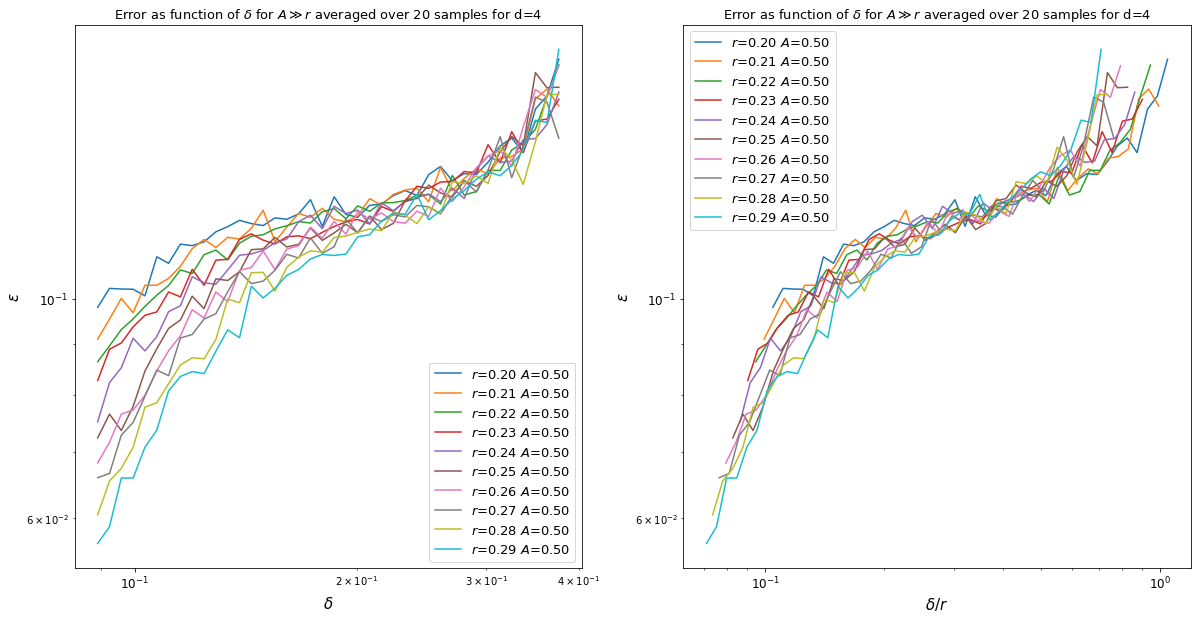

In [223]:

plt.figure('Simulation3',figsize=(20,10))
plt.subplot(1,2,1)
for i in range(0,len(lambdas5),2):
    for j in range(1) :
        plt.plot(p**-0.25,data_sim6[i,j],'-',label = ('$r$=%.2f'%lambdas5[i]+' $A$=%.2f'%amplis5[j]))
#plt.plot(p**-0.25,p**-0.25,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A \gg r$ averaged over 20 samples for d=4',fontsize=13)


plt.subplot(1,2,2)
for i in range(0,len(lambdas5),2):
    for j in range(1) :
        plt.plot(p**(-4/10)/lambdas5[i],data_sim6[i,j],'-',label = ('$r$=%.2f'%lambdas5[i]+' $A$=%.2f'%amplis5[j]))
#plt.plot(p**-0.25/lambdas5[i],p**-0.25,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta/r$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A \gg r$ averaged over 20 samples for d=4',fontsize=13)
plt.savefig('PlotA_gg_r_11_05',format='png')



In [195]:
lambdas7=np.load('18r_tab_10_05.npy')
amplis7=np.load('18a_tab_10_05.npy')
#data_10_05_na=np.load('16data_results_10_05.npy')
print(lambdas7)
print(amplis7)
data_sim8=np.average(data_06_05_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

[0.1        0.11428571 0.12857143 0.14285714 0.15714286 0.17142857
 0.18571429 0.2       ]
[1.02329299e+00 2.18776162e+03 4.67735141e+06 1.00000000e+10]


Text(0.5, 1.0, 'Error as function of $\\delta$ for $A\\ll r$ averaged over 10 samples')

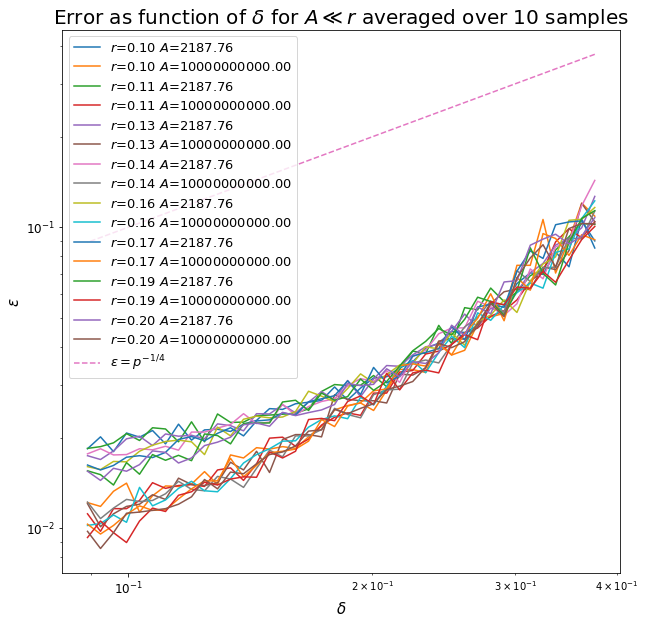

In [199]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(len(lambdas7)):
    for j in range(1,len(amplis7),2) :
        plt.plot(p**(-1/4),data_sim8[i,j],'-',label = ('$r$=%.2f'%lambdas7[i]+' $A$=%.2f'%amplis7[j]))
plt.plot(p**-0.25,p**-0.25,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A\ll r$ averaged over 10 samples',fontsize=20)
#plt.savefig('PlotA_ll_r_11_05',format='png')

In [396]:
lambdas8=np.load('19r_tab_11_05.npy')
amplis8=np.load('19a_tab_11_05.npy')
data_11_05_na=np.load('19data_results_11_05.npy')
print(len(data_11_05_na))
data_sim9=np.average(data_11_05_na,axis=0)
data_std9=np.std(data_11_05_na, axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

print(lambdas8)
print(amplis8)

20
[0.05       0.08333333 0.11666667 0.15       0.18333333 0.21666667
 0.25       0.28333333 0.31666667 0.35      ]
[0.05  0.525 1.   ]


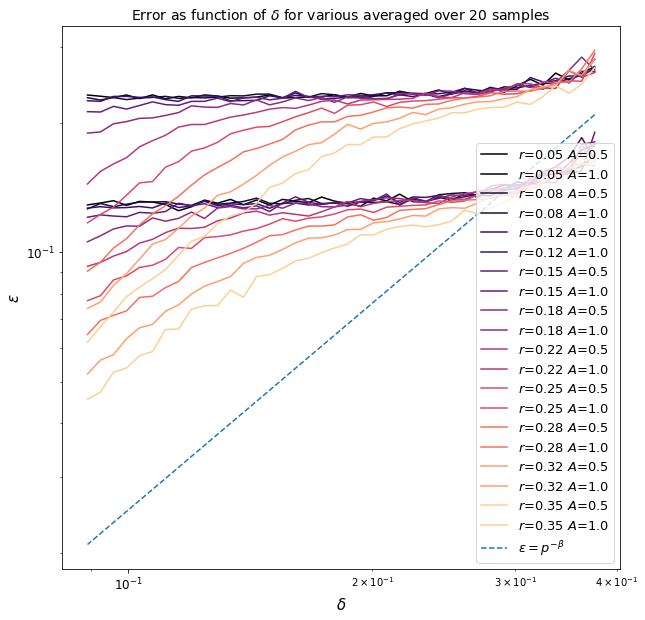

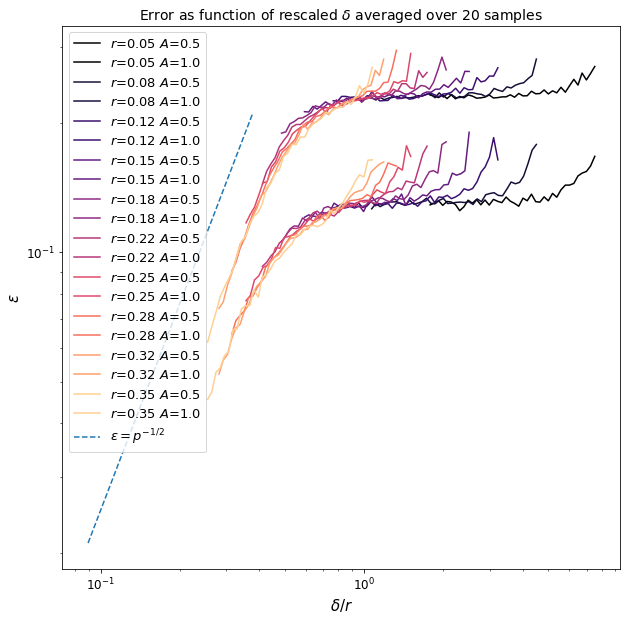

In [554]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(0,len(lambdas8)):
    for j in range(1,3,1) :
        plt.plot(p**(-1/4)/lambdas8[i]**0,data_sim9[i,j]/Probability(-amplis8[j],amplis8[j])**0,'-',color=cm.magma(i/10),label = ('$r$=%.2f'%lambdas8[i]+' $A$=%.1f'%amplis8[j]))
       # up = (data_sim9[i,j]+0.5*data_std9[i,j])
        #down= (data_sim9[i,j]-0.5*data_std9[i,j])
        #plt.fill_between(p**(-1/4), up, down, alpha=.3)
plt.plot(p**-0.25,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for various averaged over 20 samples',fontsize=14)
plt.savefig('Plot3bis',format='png')

plt.figure('Simulation4',figsize=(10,10))
for i in range(len(lambdas8)):
    for j in range(1,3) :
        plt.plot(p**(-1/4)/lambdas8[i],data_sim9[i,j],'-',color=cm.magma(i/10),label = ('$r$=%.2f'%lambdas8[i]+' $A$=%.1f'%amplis8[j]))
plt.plot(p**-0.25,p**-0.4,'--',label='$\epsilon=p^{-1/2}$')
plt.xlabel('$\delta/r$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
#
plt.title('Error as function of rescaled $\delta$ averaged over 20 samples' ,fontsize=14)
plt.savefig('Plot4',format='png')



In [254]:
lambdas9=np.load('20r_tab_12_05.npy')
amplis9=np.load('20a_tab_12_05.npy')
data_12_05_na=np.load('20data_results_12_05.npy')
data_sim10=np.average(data_12_05_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

print(lambdas9)

[0.01       0.04413793 0.07827586 0.11241379 0.14655172 0.18068966
 0.21482759 0.24896552 0.28310345 0.31724138 0.35137931 0.38551724
 0.41965517 0.4537931  0.48793103 0.52206897 0.5562069  0.59034483
 0.62448276 0.65862069 0.69275862 0.72689655 0.76103448 0.79517241
 0.82931034 0.86344828 0.89758621 0.93172414 0.96586207 1.        ]


Text(0.5, 1.0, 'Error as function of $\\delta$ for $A\\ll r$ averaged over 10 samples')

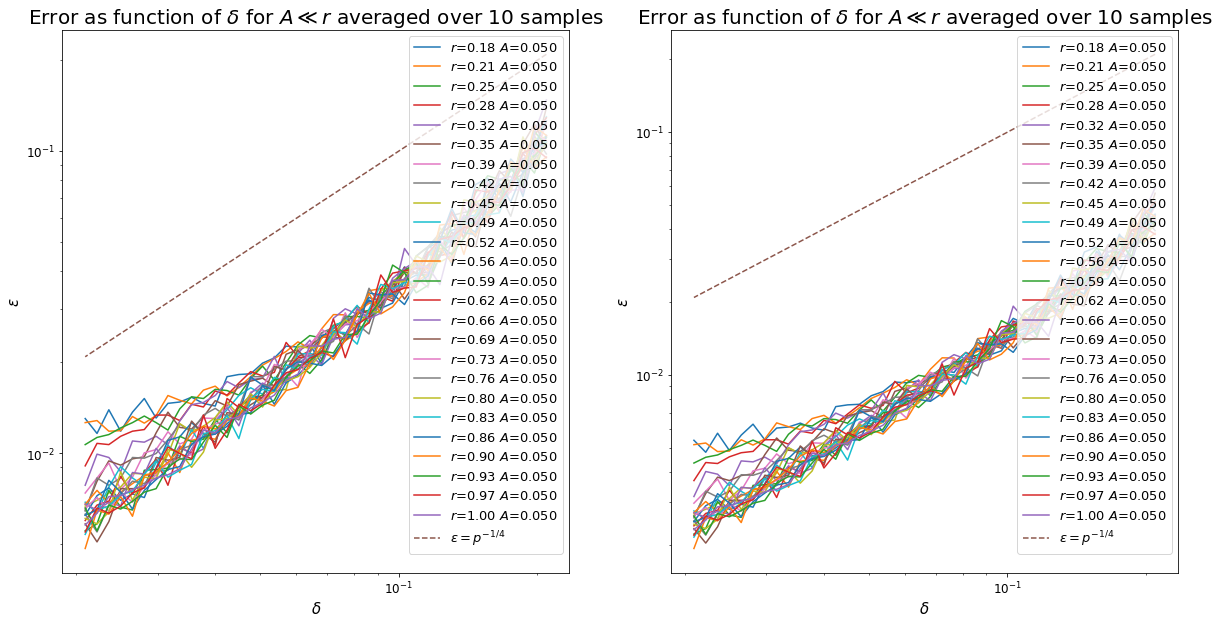

In [532]:
plt.figure('Simulation3',figsize=(20,10))
plt.subplot(1,2,1)
for i in range(5,len(lambdas9)):
    for j in range(len(amplis9)) :
        plt.plot(p**(-4/10)/lambdas9[i]**0,data_sim10[i,j]/np.sqrt(2*np.pi/(1+amplis9[j]**2/lambdas9[i]**2))**0,'-',label = ('$r$=%.2f'%lambdas9[i]+' $A$=%.3f'%amplis9[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A\ll r$ averaged over 10 samples',fontsize=20)
#plt.savefig('PlotA_ll_r_11_05',format='png')

plt.subplot(1,2,2)
for i in range(5,len(lambdas9)):
    for j in range(len(amplis9)) :
        plt.plot(p**(-4/10)/lambdas9[i]**0,data_sim10[i,j]/np.sqrt(2*np.pi/(1+amplis9[j]**2/lambdas9[i]**2)),'-',label = ('$r$=%.2f'%lambdas9[i]+' $A$=%.3f'%amplis9[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A\ll r$ averaged over 10 samples',fontsize=20)
#plt.savefig('PlotA_ll_r_11_05',format='png')


In [290]:
lambdas10=np.load('21r_tab_13_05.npy')
amplis10=np.load('21a_tab_13_05.npy')
data_13_05_na=np.load('21data_results_13_05.npy')
data_sim11=np.average(data_13_05_na,axis=0)
data_std11=np.std(data_13_05_na, axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)
print(amplis10)
print(lambdas10)


[0.05 0.03]
[0.25       0.25526316 0.26052632 0.26578947 0.27105263 0.27631579
 0.28157895 0.28684211 0.29210526 0.29736842 0.30263158 0.30789474
 0.31315789 0.31842105 0.32368421 0.32894737 0.33421053 0.33947368
 0.34473684 0.35      ]


Text(0.5, 1.0, 'Error as function of $\\delta$ for $A\\ll r$ averaged over 10 samples')

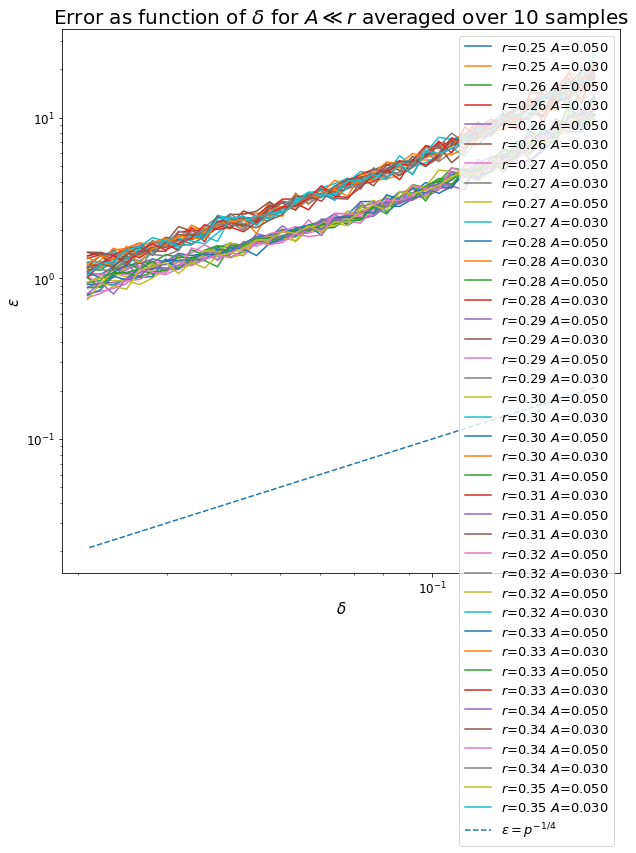

In [621]:
x = np.log(p)
dx = np.array([x[i+1]-x[i] for i in range(len(x)-1)])
temp1 = data_sim11[:,:,:-1]
temp2=data_sim11[:,:,1:]
slope = temp2-temp1
plt.figure('Slope',figsize=(10,10))
for i in range(0,len(lambdas10)):
    for j in range(len(amplis10)) :
        plt.plot(p**-0.4,data_sim11[i,j]/Errorf(amplis10[j],lambdas10[i])[0]/amplis10[j]*lambdas10[i]**0,'-',label = ('$r$=%.2f'%lambdas10[i]+' $A$=%.3f'%amplis10[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A\ll r$ averaged over 10 samples',fontsize=20)
#plt.savefig('PlotA_ll_r_11_05',format='png')

Text(0.5, 1.0, 'Error as function of $\\delta$ for $A\\ll r$ averaged over 10 samples')

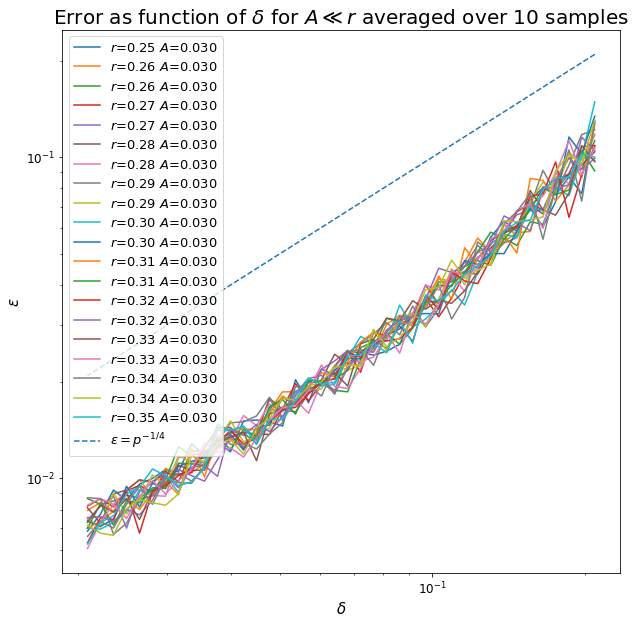

In [268]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(0,len(lambdas10)):
    for j in range(1,len(amplis10)) :
        plt.plot(p**-0.4/lambdas10[i]**0,data_sim11[i,j],'-',label = ('$r$=%.2f'%lambdas10[i]+' $A$=%.3f'%amplis10[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A\ll r$ averaged over 10 samples',fontsize=20)
#plt.savefig('PlotA_ll_r_11_05',format='png')

In [200]:
lambdas11=np.load('22r_tab_22_05.npy')
amplis11=np.load('22a_tab_22_05.npy')
data_22_05_na=np.load('22data_results_22_05.npy')
data_sim12=np.average(data_22_05_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)
print(lambdas11)
print(amplis11)




[0.01       0.02154435 0.04641589 0.1        0.21544347 0.46415888
 1.        ]
[0.01       0.02154435 0.04641589 0.1        0.21544347 0.46415888
 1.        ]


Text(0.5, 1.0, 'Error as function of $\\delta$ for $A\\ll r$ averaged over 10 samples')

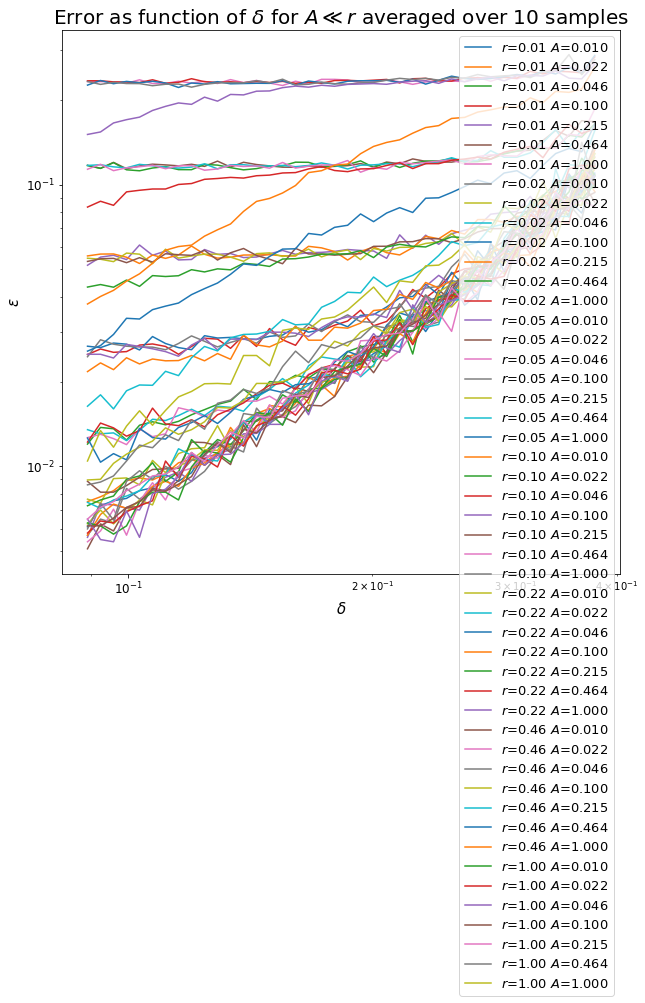

In [623]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(len(lambdas11)):
    for j in range(0,len(amplis11),1) :
        plt.plot(p**(-1/4)/lambdas11[i]**0,data_sim12[i,j]/Probability(-amplis11[j],amplis11[j])**0,'-',label = ('$r$=%.2f'%lambdas11[i]+' $A$=%.3f'%amplis11[j]))
#plt.plot(p**-0.25,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A\ll r$ averaged over 10 samples',fontsize=20)
#plt.savefig('PlotA_ll_r_11_05',format='png')

In [538]:
lambdas0=np.load('24r_tab_05_06.npy')
amplis0=np.load('24a_tab_05_06.npy')
data_05_06=np.load('24data_results_05_06.npy')
data_sim0=np.average(data_05_06,axis=0)
print(lambdas0)
print(amplis0)


new_dat = 0.5*(data_sim0+data_sim13)

[0.05       0.11666667 0.18333333 0.25       0.31666667 0.38333333
 0.45      ]
[0.1  0.25 0.4  0.55 0.7  0.85 1.  ]


In [500]:
lambdas12=np.load('23r_tab_28_05.npy')
amplis12=np.load('23a_tab_28_05.npy')
data_28_05_na=np.load('23data_results_28_05.npy')
print(len(data_28_05_na))
data_sim13=np.average(data_28_05_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)
print(lambdas12)
print(amplis12)




10
[0.05       0.11666667 0.18333333 0.25       0.31666667 0.38333333
 0.45      ]
[0.1  0.25 0.4  0.55 0.7  0.85 1.  ]


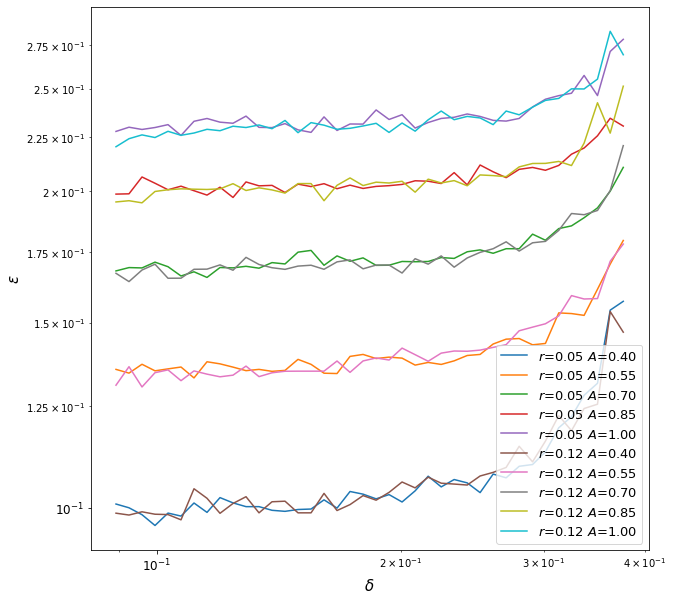

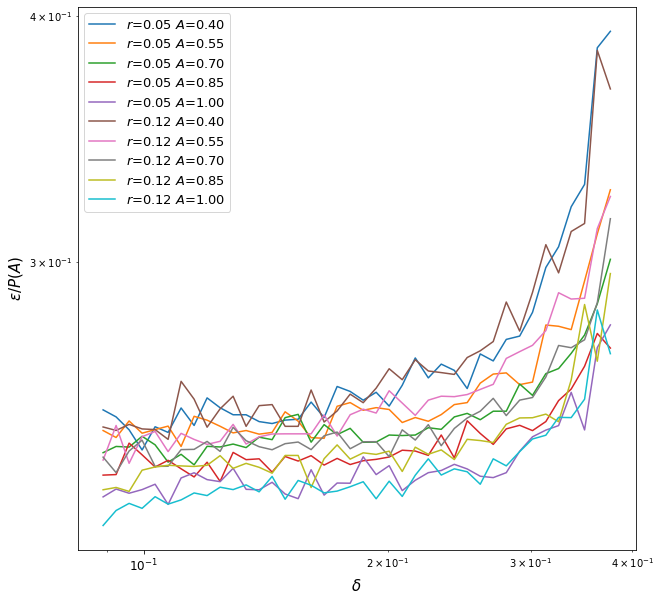

In [543]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(len(lambdas12)-5):
    for j in range(2,len(amplis12),1):
        plt.plot(p**-0.25*amplis12[j]**0/lambdas12[i]**0,new_dat[i,j]/Probability(-amplis12[j],amplis12[j])**0,'-',label = ('$r$=%.2f'%lambdas12[i]+' $A$=%.2f'%amplis12[j]))
#plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
#plt.title('Error as function of $\delta$ for small $r$ averaged over 10 samples',fontsize=18)
#plt.savefig('Plot5',format='png')
plt.figure('Simulation4',figsize=(10,10))
for i in range(len(lambdas12)-5):
    for j in range(2,len(amplis12),1):
        plt.plot(p**(-0.25),new_dat[i,j]/amplis12[j],'-',label = ('$r$=%.2f'%lambdas12[i]+' $A$=%.2f'%amplis12[j]))
#plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon/P(A)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
#plt.title('Rescaled error as function of $\delta$ for small $r$ averaged over 10 samples',fontsize=18)
#plt.savefig('Plot6',format='png')

Text(0.5, 1.0, 'Error as function of $\\delta$ for $A \\approx r$ averaged over 10 samples')

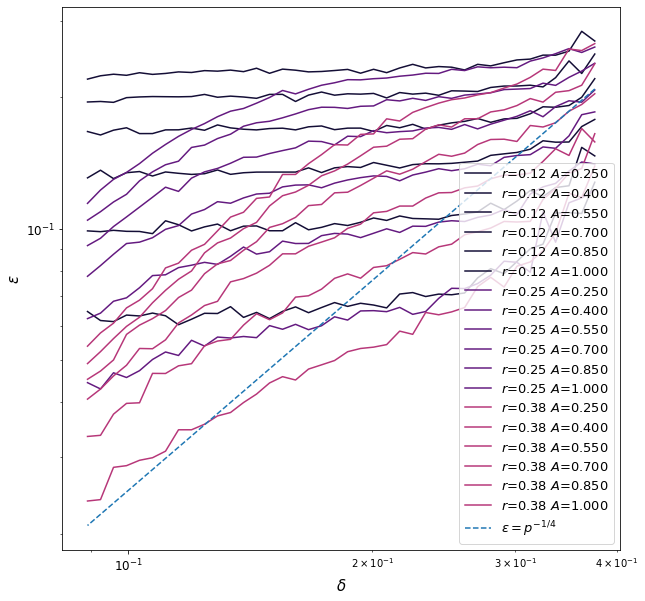

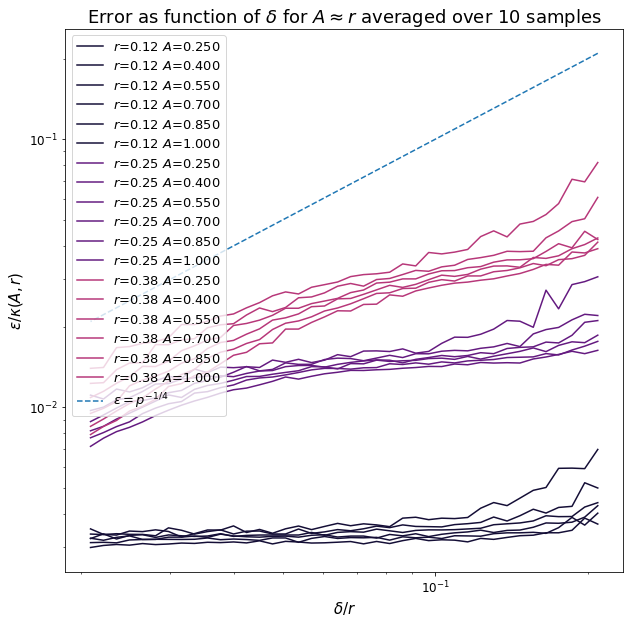

In [558]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(1,len(lambdas12),2):
    for j in range(1,len(amplis12),1):
        plt.plot(p**-0.25*amplis12[j]**0/lambdas12[i]**0,new_dat[i,j]/Probability(-amplis12[j],amplis12[j])**0,'-',color=cm.magma(i/10),label = ('$r$=%.2f'%lambdas12[i]+' $A$=%.3f'%amplis12[j]))
plt.plot(p**-0.25,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
#plt.title('Error as function of $\delta$ for $A \\approx r$ averaged over 10 samples',fontsize=18)

plt.figure('Sim',figsize=(10,10))
for i in range(1,len(lambdas12),2):
    for j in range(1,len(amplis12),1):
        plt.plot(p**(-4/10),new_dat[i,j]/Errorf(amplis12[j],lambdas12[i])[0]**0/amplis12[j]*lambdas12[i]**2,'-',color=cm.magma(i/10),label = ('$r$=%.2f'%lambdas12[i]+' $A$=%.3f'%amplis12[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-1/4}$')
plt.xlabel('$\delta/r$',size=15)
plt.ylabel('$\epsilon/\kappa(A,r)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A \\approx r$ averaged over 10 samples',fontsize=18)

#plt.savefig('PlotA_ll_r_11_05',format='png')

In [561]:
lambdas13=np.load('24r_tab_01_06.npy')
amplis13=np.load('24a_tab_01_06.npy')
data_01_06_na=np.load('24data_results_01_06.npy')
data_sim14=np.average(data_01_06_na,axis=0)
print(len(data_sim14))
p = np.logspace(1.7,4.2,num=40,dtype=int)
print(lambdas12)
print(amplis12)
print(p)



7
[0.05       0.11666667 0.18333333 0.25       0.31666667 0.38333333
 0.45      ]
[0.1  0.25 0.4  0.55 0.7  0.85 1.  ]
[   50    58    67    78    90   104   121   140   163   189   219   254
   294   341   395   458   531   616   714   827   959  1112  1289  1494
  1731  2007  2326  2696  3125  3622  4198  4866  5640  6537  7576  8781
 10178 11797 13674 15848]


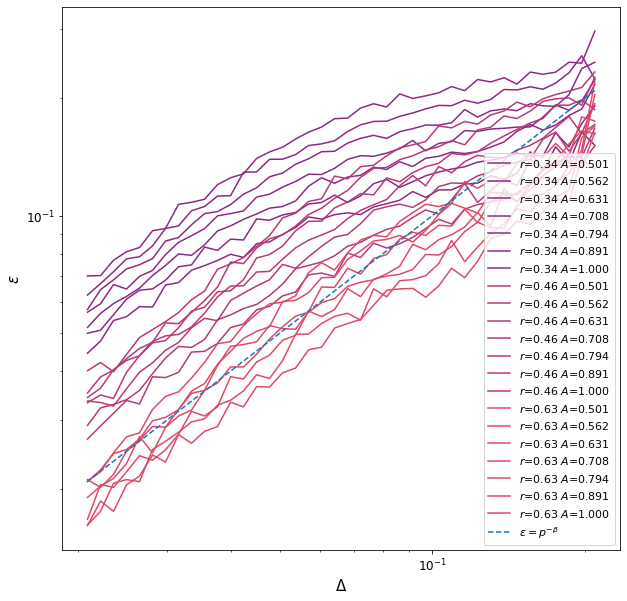

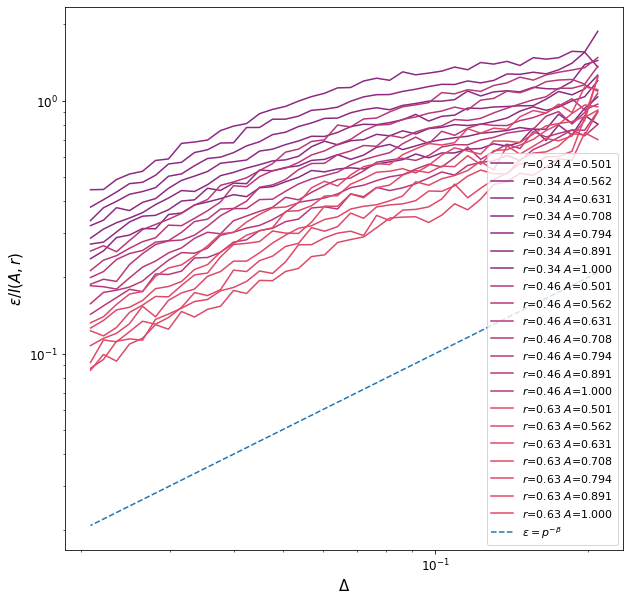

In [634]:
plt.figure('Simulation3',figsize=(10,10))
for i in range(len(lambdas13)-3,len(lambdas13)):
    for j in range(0,len(amplis13)):
        plt.plot(p**(-4/10)*amplis13[j]**0/lambdas13[i]**0,data_sim14[i,j]/Probability(-amplis13[j],amplis13[j])**0,'-',color=cm.magma((i)/10),label = ('$r$=%.2f'%lambdas13[i]+' $A$=%.3f'%amplis13[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\Delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=11)
#plt.title('Error as function of $\Delta\sim p^{-\\beta}$ for $A approx r$ averaged over 10 samples',fontsize=18)
#plt.savefig('Plot7a',format='png')
plt.figure('Sim',figsize=(10,10))
for i in range(len(lambdas13)-3,len(lambdas13)):
    for j in range(0,len(amplis13),1):
        #print(Errorf(amplis13[j],lambdas13[i])[0])
        plt.plot(p**-0.4,data_sim14[i,j]/Errorf(amplis13[j],lambdas13[i])[0]**1,'-',color=cm.magma(i/10),label = ('$r$=%.2f'%lambdas13[i]+' $A$=%.3f'%amplis13[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\Delta$',size=15)
plt.ylabel('$\epsilon/I(A,r)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=11)
#plt.title('Rescaled error as function of $\Delta\sim p^{-\\beta}$ averaged over 10 samples',fontsize=18)
plt.savefig('Plot8c',format='png')

In [355]:
lambdas14=np.load('26r_tab_10_06.npy')
amplis14=np.load('26a_tab_10_06.npy')
data_10_06_na=np.load('26data_results_10_06.npy')
data_sim15=np.average(data_10_06_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

Text(0.5, 1.0, 'Error as function of rescaled $\\delta$ for $A approx r$ averaged over 10 samples')

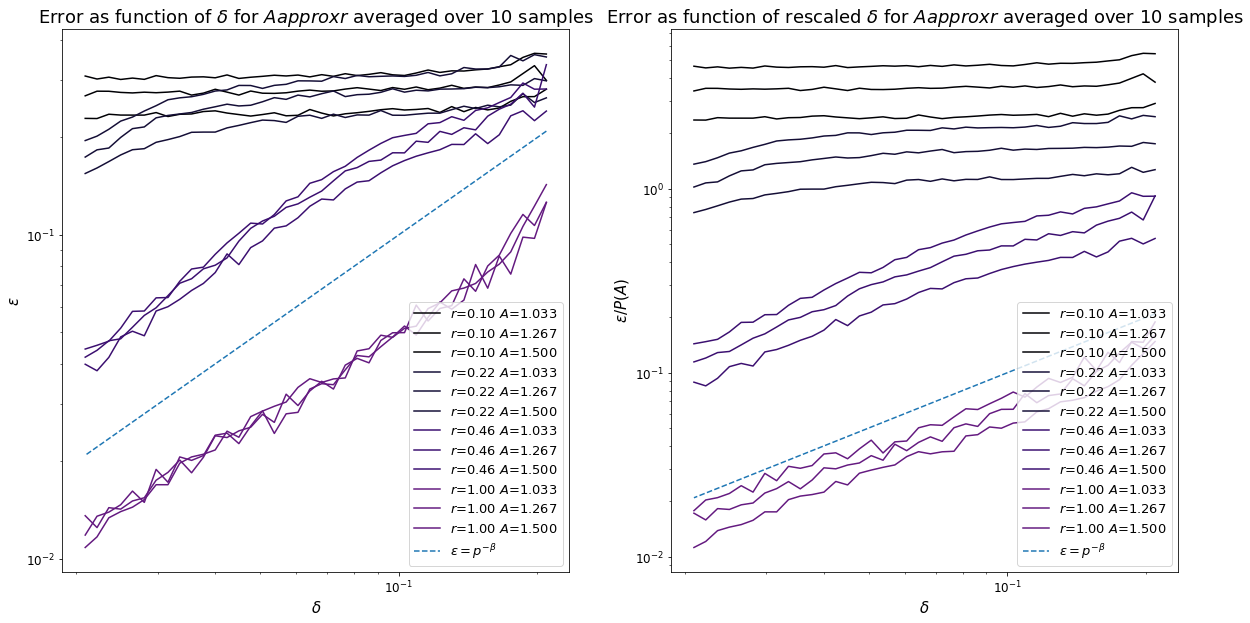

In [632]:
plt.figure('Simulation3',figsize=(20,10))
plt.subplot(1,2,1)
for i in range(0,4):
    for j in range(4,len(amplis14)):
        plt.plot(p**(-4/10),data_sim15[i,j],'-',color=cm.magma((i)/10),label = ('$r$=%.2f'%lambdas14[i]+' $A$=%.3f'%amplis14[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of $\delta$ for $A approx r$ averaged over 10 samples',fontsize=18)
plt.subplot(1,2,2)
for i in range(0,4):
    for j in range(4,len(amplis14),1):
        #print(Errorf(amplis13[j],lambdas13[i])[0])
        plt.plot(p**-0.4,data_sim15[i,j]/lambdas14[i]*amplis14[j],'-',color=cm.magma((i)/10),label = ('$r$=%.2f'%lambdas14[i]+' $A$=%.3f'%amplis14[j]))
plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon/P(A)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
plt.title('Error as function of rescaled $\delta$ for $A approx r$ averaged over 10 samples',fontsize=18)
#plt.savefig('PlotA_ll_r_11_05',format='png')

In [364]:
lambdas15=np.load('27r_tab_10_06.npy')
amplis15=np.load('27a_tab_10_06.npy')
data_11_06_na=np.load('27data_results_10_06.npy')
data_sim16=np.average(data_11_06_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

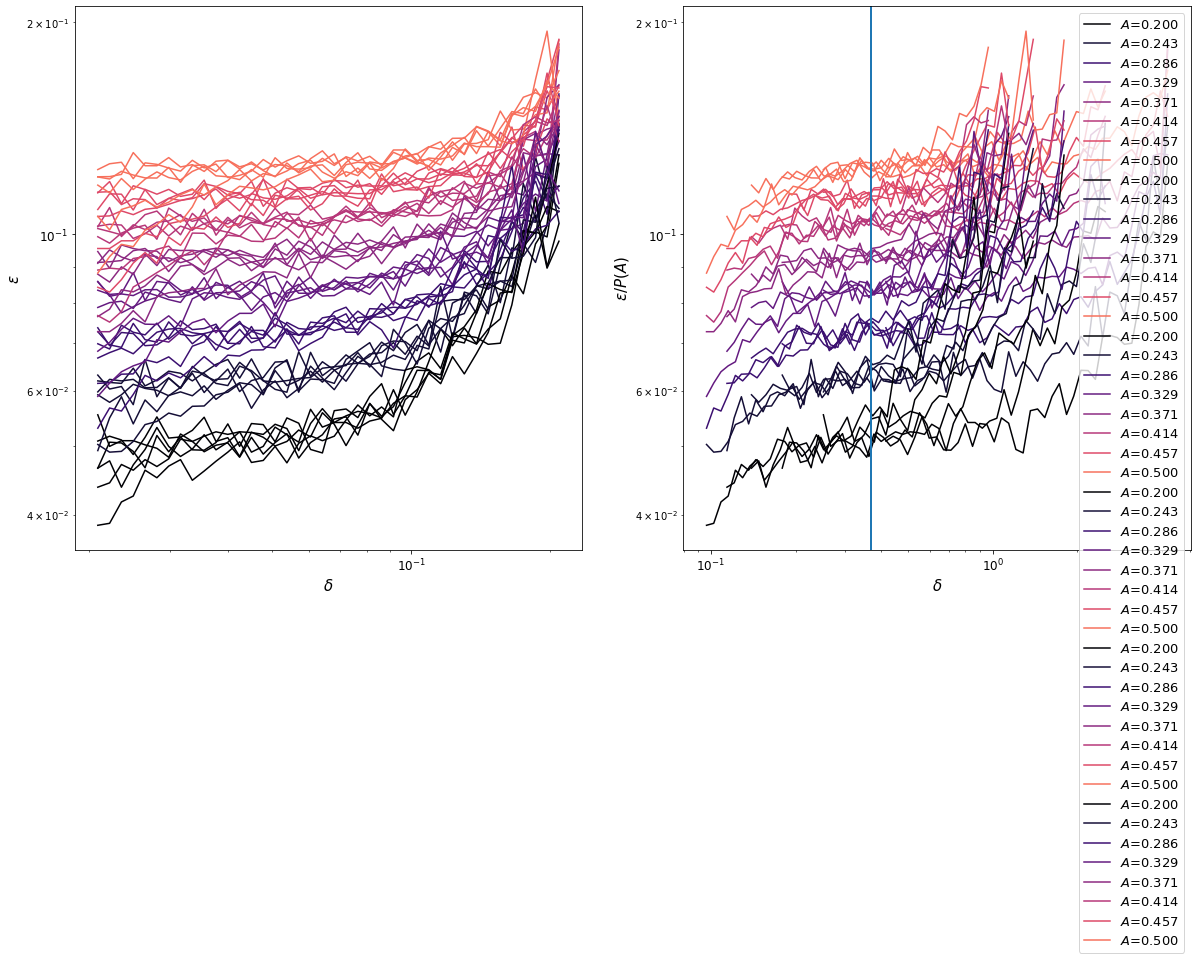

In [530]:
plt.figure('Simulation3',figsize=(20,10))
plt.subplot(1,2,1)
for i in range(0,len(lambdas15)-4,1):
    for j in range(0,len(amplis15),1):
        plt.plot(p**(-4/10),data_sim16[i,j],'-',color = cm.magma(j/10),label = (' $A$=%.3f'%amplis15[j]))
#plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
#plt.legend(fontsize=13)
#plt.title('Error as function of $\delta$ for $A approx r$ averaged over 10 samples',fontsize=18)
plt.subplot(1,2,2)
for i in range(0,len(lambdas15)-4,1):
    for j in range(0,len(amplis15),1):
        #print(Errorf(amplis13[j],lambdas13[i])[0])
        plt.plot(p**-0.4/lambdas15[i],data_sim16[i,j]/Probability(-amplis15[j],amplis15[j])**0,'-', color = cm.magma(j/10),label = ( '$A$=%.3f'%amplis15[j]))
        plt.axvline(x=0.37)
#plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon/P(A)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
#plt.title('Error as function of rescaled $\delta$ for $A approx r$ averaged over 10 samples',fontsize=18)
#plt.savefig('PlotA_ll_r_11_05',format='png')

In [611]:
lambdas16=np.load('28r_tab_10_06.npy')
amplis16=np.load('28a_tab_10_06.npy')
data_12_06_na=np.load('28data_results_10_06.npy')
data_sim17=np.average(data_12_06_na,axis=0)
p = np.logspace(1.7,4.2,num=40,dtype=int)

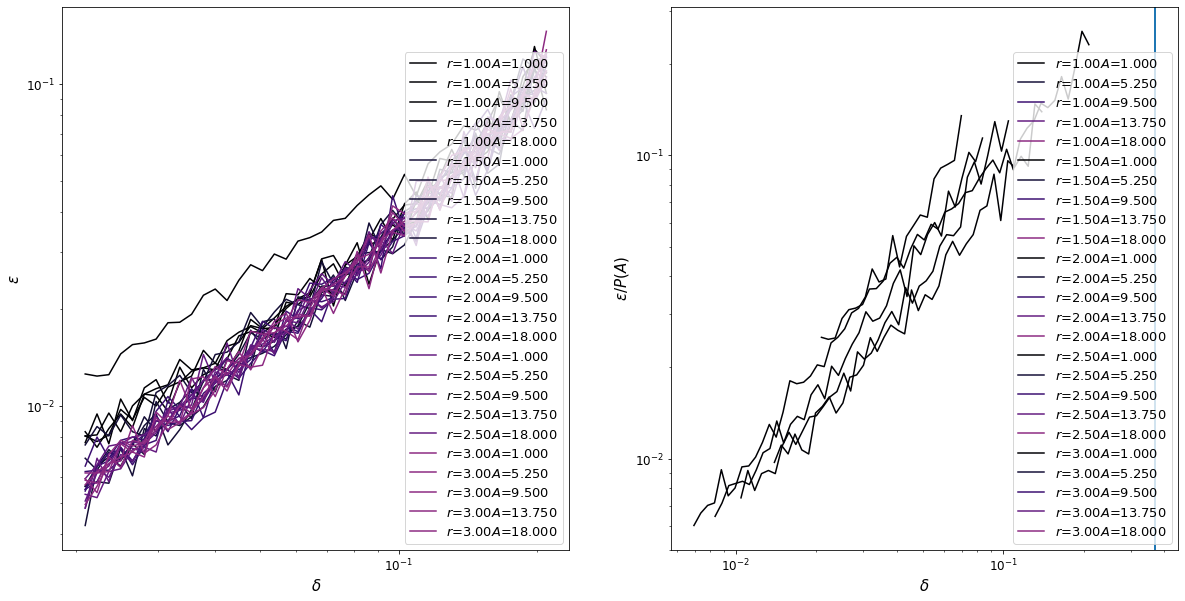

In [619]:
plt.figure('Simulation3',figsize=(20,10))
plt.subplot(1,2,1)
for i in range(0,len(lambdas16),1):
    for j in range(0,len(amplis16),1):
        plt.plot(p**(-4/10),data_sim17[i,j],'-',color = cm.magma(i/10),label = ('$r$=%.2f'%lambdas16[i]+ '$A$=%.3f'%amplis16[j]))
#plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)
#plt.title('Error as function of $\delta$ for $A approx r$ averaged over 10 samples',fontsize=18)
plt.subplot(1,2,2)
for i in range(0,len(lambdas16),1):
    for j in range(0,len(amplis16),1):
        #print(Errorf(amplis13[j],lambdas13[i])[0])
        plt.plot(p**-0.4/lambdas16[i],data_sim17[i,j]/(1-amplis16[j]**2/(2*lambdas16[i]**2)),'-', color = cm.magma(j/10),label = ( '$r$=%.2f'%lambdas16[i]+ '$A$=%.3f'%amplis16[j]))
        plt.axvline(x=0.37)
#plt.plot(p**-0.4,p**-0.4,'--',label='$\epsilon=p^{-\\beta}$')
plt.xlabel('$\delta$',size=15)
plt.ylabel('$\epsilon/P(A)$',size=15)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=12)
plt.legend(fontsize=13)

### Simulation run

In [609]:
d= 4
r_test = np.linspace(1.,3.,5)
a_test = np.linspace(1.,18.,5)
res_test6 = learning_r_a_delta(r=r_test,a=a_test,number=8)
np.save('28a_tab_10_06', a_test, allow_pickle=True, fix_imports=True)
np.save('28r_tab_10_06', r_test, allow_pickle=True, fix_imports=True)
np.save('28data_results_10_06',res_test6[0], allow_pickle=True, fix_imports=True)
#np.save('19delta_results_11_05',deltas_npy,allow_pickle=True, fix_imports=True)



--------------------------------------> r = 1.0
------------------------------------> A = 1.0
------------> SAMPLE# : 1
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 2
TRAINING SIZE : 50
TRAINING SIZE : 5

TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 3
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING 

TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 5
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 

------------> SAMPLE# : 6
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 7
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE :

TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 8
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING 

TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 2
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 

------------> SAMPLE# : 3
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 4
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE :

TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 5
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING 

TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 7
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 

TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 8
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------------------------------> A = 5.25
------------> SAMPLE# : 1
TRAINING SIZE : 50
TRAINING SIZE : 58
T

TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 2
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING 

TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 4
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 

------------> SAMPLE# : 5
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 6
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE :

TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 7
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING 

TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------------------------------> A = 9.5
------------> SAMPLE# : 1
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING S

TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 2
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 3
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAININ

TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 4
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING 

TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 6
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 

TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 8
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 

------------------------------------> A = 13.75
------------> SAMPLE# : 1
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 2
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINI

TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING SIZE : 4866
TRAINING SIZE : 5640
TRAINING SIZE : 6537
TRAINING SIZE : 7576
TRAINING SIZE : 8781
TRAINING SIZE : 10178
TRAINING SIZE : 11797
TRAINING SIZE : 13674
TRAINING SIZE : 15848
------------> SAMPLE# : 3
TRAINING SIZE : 50
TRAINING SIZE : 58
TRAINING SIZE : 67
TRAINING SIZE : 78
TRAINING SIZE : 90
TRAINING SIZE : 104
TRAINING SIZE : 121
TRAINING SIZE : 140
TRAINING SIZE : 163
TRAINING SIZE : 189
TRAINING SIZE : 219
TRAINING SIZE : 254
TRAINING SIZE : 294
TRAINING SIZE : 341
TRAINING SIZE : 395
TRAINING SIZE : 458
TRAINING SIZE : 531
TRAINING SIZE : 616
TRAINING SIZE : 714
TRAINING SIZE : 827
TRAINING SIZE : 959
TRAINING SIZE : 1112
TRAINING SIZE : 1289
TRAINING SIZE : 1494
TRAINING SIZE : 1731
TRAINING SIZE : 2007
TRAINING SIZE : 2326
TRAINING SIZE : 2696
TRAINING SIZE : 3125
TRAINING SIZE : 3622
TRAINING SIZE : 4198
TRAINING 

In [492]:
a = [0.2,0.243,0.286,0.329,0.371,0.414,0.457,0.5]